<a href="https://colab.research.google.com/github/Yashasvi-Kocherlakota/DeliveryRiskFuntionApp/blob/main/Classification__titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
import pandas as pd

# Read a CSV file
df = pd.read_csv('/content/titanic.csv')

# Preview the first few rows
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:

df.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
df.drop_duplicates(inplace=True)



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)


In [38]:
# Fill Embarked with mode of the passenger's class
df['Embarked'] = df.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))


In [39]:
# Step 1: Separate known and unknown ages
known_age = df[df['Age'].notnull()]
unknown_age = df[df['Age'].isnull()]

# Step 2: Encode Sex for regression
known_age = pd.get_dummies(known_age, columns=['Sex'], drop_first=True)
unknown_age = pd.get_dummies(unknown_age, columns=['Sex'], drop_first=True)

# Step 3: Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(known_age[['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male']], known_age['Age'])

# Step 4: Predict
predicted_ages = reg.predict(unknown_age[['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male']])

# Step 5: Fill
df.loc[df['Age'].isnull(), 'Age'] = predicted_ages


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [41]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [42]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

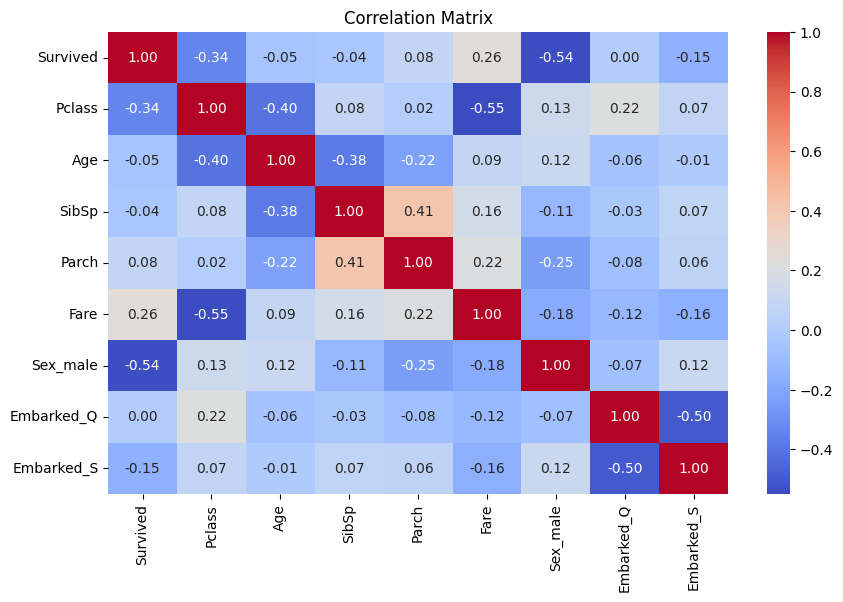

In [43]:
# Include only numeric columns for correlation
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

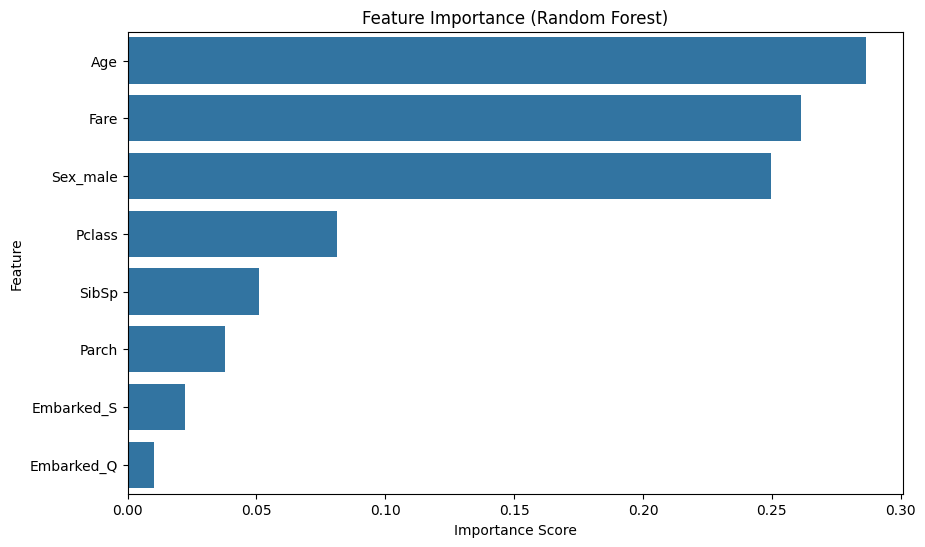

In [44]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Survived', axis=1)
y = df['Survived']

# Fit Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [45]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

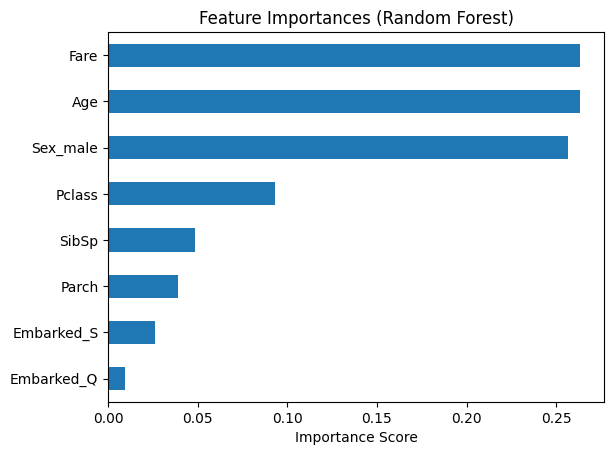

In [47]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.show()


In [48]:
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']               # Target variable


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [52]:
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)



In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred, name):
    print(f"\n{name} Performance:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Logistic Regression Performance:
Accuracy : 0.8212290502793296
Precision: 0.8135593220338984
Recall   : 0.6956521739130435
F1 Score : 0.75
Confusion Matrix:
 [[99 11]
 [21 48]]

Random Forest Performance:
Accuracy : 0.7877094972067039
Precision: 0.7313432835820896
Recall   : 0.7101449275362319
F1 Score : 0.7205882352941176
Confusion Matrix:
 [[92 18]
 [20 49]]


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Evaluate best model
y_pred_best_rf = best_rf.predict(X_test)

evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")



Tuned Random Forest Performance:
Accuracy : 0.7988826815642458
Precision: 0.7704918032786885
Recall   : 0.6811594202898551
F1 Score : 0.7230769230769231
Confusion Matrix:
 [[96 14]
 [22 47]]


In [55]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_logreg = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_logreg,
    cv=5,
    scoring='f1'
)

grid_logreg.fit(X_train_scaled, y_train)
best_logreg = grid_logreg.best_estimator_

# Evaluate best model
y_pred_best_logreg = best_logreg.predict(X_test_scaled)

evaluate_model(y_test, y_pred_best_logreg, "Tuned Logistic Regression")



Tuned Logistic Regression Performance:
Accuracy : 0.8100558659217877
Precision: 0.8070175438596491
Recall   : 0.6666666666666666
F1 Score : 0.7301587301587301
Confusion Matrix:
 [[99 11]
 [23 46]]


In [56]:
# Import XGBoost classifier
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Custom evaluation function
def evaluate_model(y_true, y_pred, name):
    print(f"\n{name} Performance:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Call evaluation
evaluate_model(y_test, y_pred_xgb, "XGBoost Classifier")



XGBoost Classifier Performance:
Accuracy : 0.8044692737430168
Precision: 0.7575757575757576
Recall   : 0.7246376811594203
F1 Score : 0.7407407407407407
Confusion Matrix:
 [[94 16]
 [19 50]]
